# Introduction

This document will describe the investigation process of analysing a medical data set regarding lung cancer. This data set is retrieved from Kaggle using this link https://www.kaggle.com/mysarahmadbhat/lung-cancer. This document will first analyse the data set in an attempt to understand the data. Following this, the data set will be prepared to fit into models, the models will be created and an evaluation will be made.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns # for making visualizations
import matplotlib.pyplot as plt #for making visualizations
from sklearn.metrics import * #for evaluation
from sklearn.model_selection import train_test_split # to divide the dataset
from sklearn.preprocessing import OneHotEncoder # To encode categorical into numerical values
from sklearn.preprocessing import StandardScaler # to feature scale the data


# To train the models
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


# For evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [2]:
# load in data
data = pd.read_csv('survey lung cancer.csv')

In [3]:
df = pd.DataFrame(data)

# Attempt to Understand the Data

In [4]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [5]:
df.info()
# We see that 2 columns are categorical, so we will most likely need to encode that later on to avoid errors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [6]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [7]:
df.nunique()

GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64

In [8]:
df.isnull().any()
# We see no null values, so we do not need to fill in the data or delete columns/rows

GENDER                   False
AGE                      False
SMOKING                  False
YELLOW_FINGERS           False
ANXIETY                  False
PEER_PRESSURE            False
CHRONIC DISEASE          False
FATIGUE                  False
ALLERGY                  False
WHEEZING                 False
ALCOHOL CONSUMING        False
COUGHING                 False
SHORTNESS OF BREATH      False
SWALLOWING DIFFICULTY    False
CHEST PAIN               False
LUNG_CANCER              False
dtype: bool

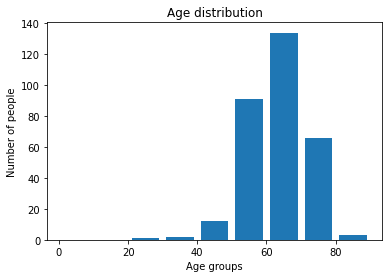

In [9]:
# Analyse the age distribution
population_age = df['AGE']
bins=[0,10,20,30,40,50,60,70,80,90]
plt.hist(population_age, bins, histtype='bar', rwidth=0.8)
plt.xlabel('Age groups')
plt.ylabel('Number of people')
plt.title("Age distribution")
plt.show()

In [10]:
df['LUNG_CANCER'].value_counts()

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64

<AxesSubplot:xlabel='LUNG_CANCER', ylabel='count'>

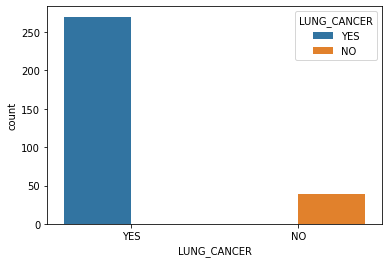

In [11]:
sns.countplot(x='LUNG_CANCER',hue='LUNG_CANCER',data=df)

<AxesSubplot:xlabel='GENDER', ylabel='count'>

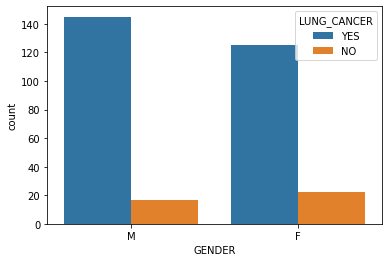

In [12]:
#lets see the distribution between males and females
sns.countplot(x='GENDER',hue='LUNG_CANCER',data=df)

In [13]:
#Lets look at it in a piechart form

#prepare bar plot to see distribution of gender and lung cancer
positive = df['LUNG_CANCER'] == "YES"
negative = df['LUNG_CANCER'] == "NO" 

positive_counts = df[positive]
negative_counts = df[negative]

#Filter dataset on males with lung cancer  
positive_counts_male = positive_counts['GENDER'] == 'M' 
pcm = positive_counts[positive_counts_male]

#Filter dataset on females with lung cancer
positive_counts_female = positive_counts['GENDER'] == 'F'
pcf = positive_counts[positive_counts_female]

#Filter dataset on males without lung cancer
negative_counts_male = negative_counts['GENDER'] == 'M'
ncm = negative_counts[negative_counts_male]

#Filter dataset on females without lung cancer
negative_counts_female = negative_counts["GENDER"] == "F"
ncf = negative_counts[negative_counts_female]


amount_of_females_with_cancer = pcf['LUNG_CANCER'].value_counts()
amount_of_males_with_cancer = pcm['LUNG_CANCER'].value_counts()
amount_of_females_without_cancer = ncf['LUNG_CANCER'].value_counts()
amount_of_males_without_cancer = ncm['LUNG_CANCER'].value_counts()

print('Amount of Females with Cancer: {}'.format(amount_of_females_with_cancer[0]))
print('Amount of Males with Cancer: {}'.format(amount_of_males_with_cancer[0]))
print('Amount of Females without Cancer: {}'.format(amount_of_females_without_cancer[0]))
print('Amount of Males without Cancer: {}'.format(amount_of_males_without_cancer[0]))
print('Total amount of cases: {}'.format(amount_of_females_with_cancer[0] + amount_of_males_with_cancer[0] 
                                        + amount_of_females_without_cancer[0] + amount_of_males_without_cancer[0]))

Amount of Females with Cancer: 125
Amount of Males with Cancer: 145
Amount of Females without Cancer: 22
Amount of Males without Cancer: 17
Total amount of cases: 309


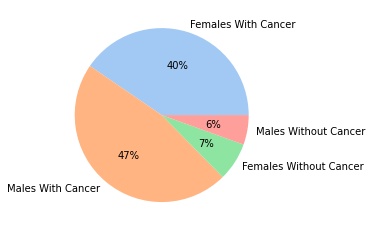

In [14]:
#define data
data = [amount_of_females_with_cancer[0], amount_of_males_with_cancer[0], 
        amount_of_females_without_cancer[0], amount_of_males_without_cancer[0]]
labels = ['Females With Cancer', 'Males With Cancer', 'Females Without Cancer', 'Males Without Cancer']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:4]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

C:\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

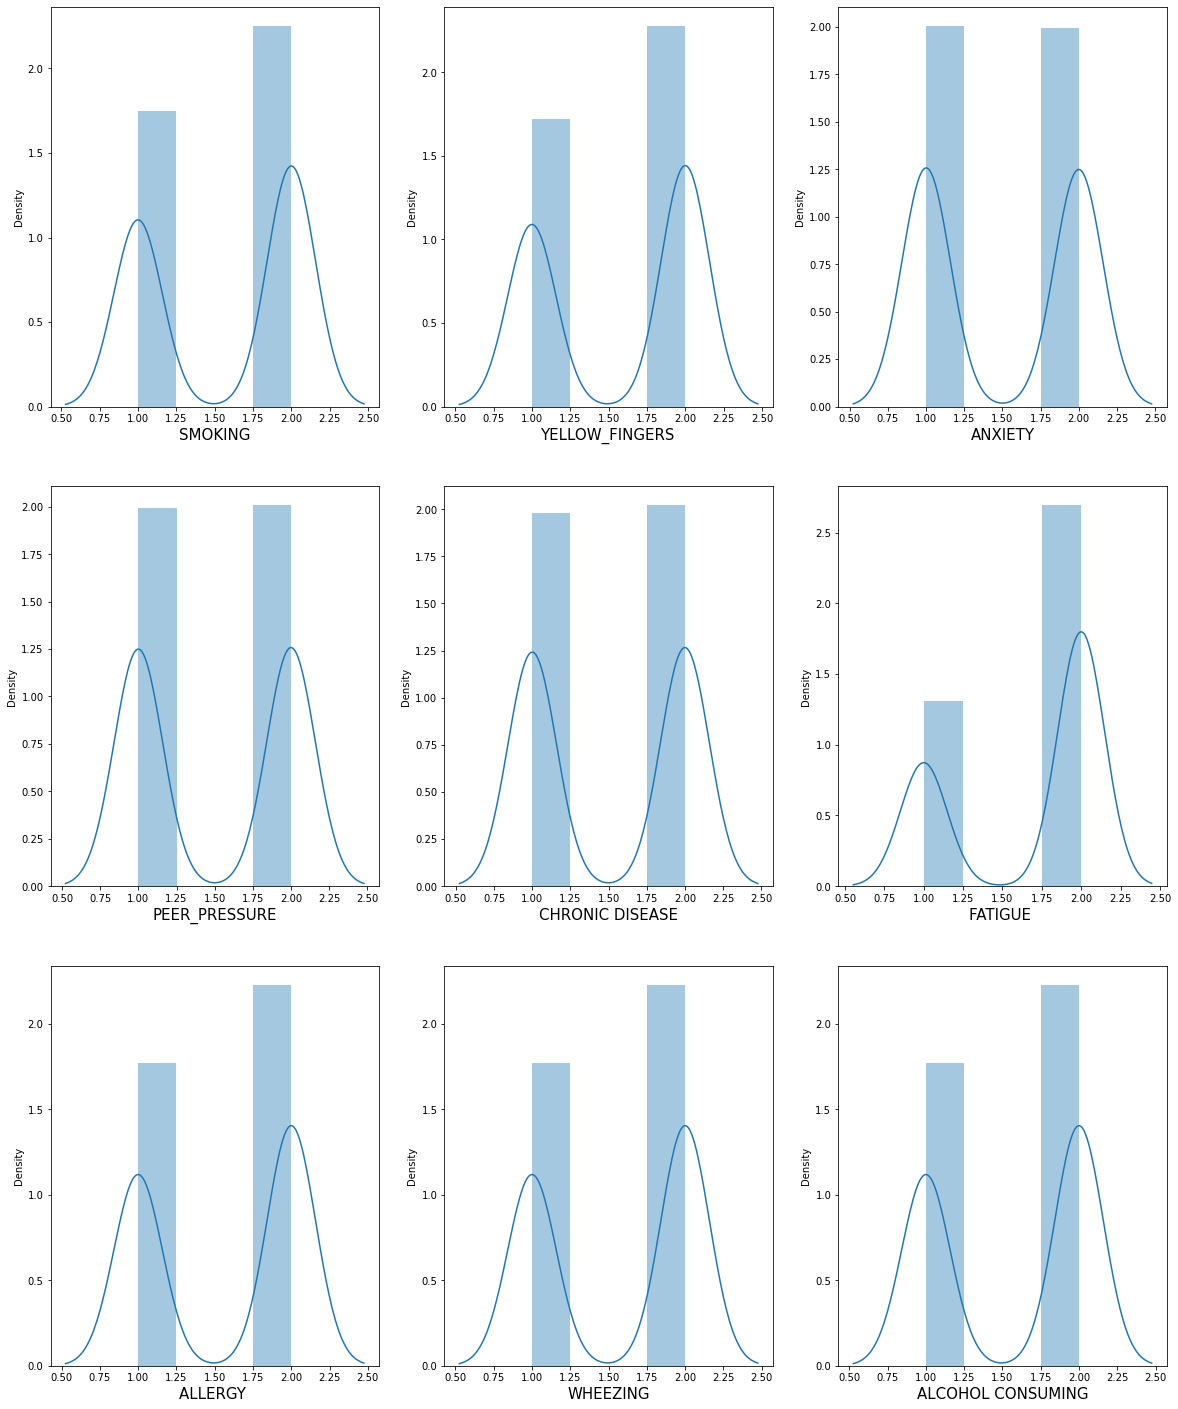

In [15]:
# Alright, we see that more male patients have cancer, but how does the rest of the dataset look like?
other_columns = df.copy()
other_columns = other_columns.drop(["GENDER", "AGE"], axis=1)

plt.figure(figsize = (20, 25))
plotnumber = 1
for column in other_columns:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(other_columns[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

# Dividing input and output column

As the goal of the eventual model is to predict if someone has lung cancer, and we do not want to 
affect the output values, we split the data now

In [16]:
secondDf = df.copy()

# save the ouput column in variable y
Y = secondDf['LUNG_CANCER']

# save the rest of the data set in variable X
X = secondDf
X = X.drop('LUNG_CANCER', axis=1)

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
dtypes: int64(14), object(1)

# Prepare the data

In [18]:
from sklearn.preprocessing import LabelEncoder
Y

0      YES
1      YES
2       NO
3       NO
4       NO
      ... 
304    YES
305    YES
306    YES
307    YES
308    YES
Name: LUNG_CANCER, Length: 309, dtype: object

In [19]:
# Encode the output column
target_var = Y.copy()

label_encoder = LabelEncoder()
target_var = label_encoder.fit_transform(target_var)
target_var

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [20]:
X_train, X_valid, y_train, y_valid = train_test_split(X, target_var, random_state=1)

In [21]:
X_train

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
291,M,71,2,2,2,1,2,1,2,2,2,2,1,2,2
17,M,57,2,2,2,2,2,1,1,1,2,1,1,2,2
110,M,58,1,2,2,1,1,2,1,2,2,2,2,2,2
228,F,56,1,2,1,2,1,2,1,1,1,2,2,1,2
125,F,53,1,2,2,2,2,2,2,1,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,F,65,1,2,2,2,2,1,2,2,2,2,2,2,1
255,F,77,1,1,1,2,2,2,1,1,2,2,2,2,1
72,M,67,1,1,1,1,2,2,2,2,2,2,2,1,2
235,F,64,1,1,2,1,2,1,2,2,2,1,1,2,1


In [22]:
print("X_train.shape: {}".format(X_train.shape))
print("X_valid.shape: {}".format(X_valid.shape))
print("Y_train.shape: {}".format(y_train.shape))
print("Y_valid.shape: {}".format(y_valid.shape))

X_train.shape: (231, 15)
X_valid.shape: (78, 15)
Y_train.shape: (231,)
Y_valid.shape: (78,)


In [23]:
# Filter on all categorical columns in the input set
s = (X.dtypes == 'object')
X_categorical = list(s[s].index)
X_categorical

['GENDER']

In [24]:
X_train

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
291,M,71,2,2,2,1,2,1,2,2,2,2,1,2,2
17,M,57,2,2,2,2,2,1,1,1,2,1,1,2,2
110,M,58,1,2,2,1,1,2,1,2,2,2,2,2,2
228,F,56,1,2,1,2,1,2,1,1,1,2,2,1,2
125,F,53,1,2,2,2,2,2,2,1,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,F,65,1,2,2,2,2,1,2,2,2,2,2,2,1
255,F,77,1,1,1,2,2,2,1,1,2,2,2,2,1
72,M,67,1,1,1,1,2,2,2,2,2,2,2,1,2
235,F,64,1,1,2,1,2,1,2,2,2,1,1,2,1


In [25]:
# We see that Gender is of dtype object and the values are categorical,
# so we will have to change that to numerical

# We apply one-hor encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[X_categorical]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[X_categorical]))

# One-hot encoding removed index; here we put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Once encoded, we need to remove the categorical column from the original dataframe
num_X_train = X_train.drop(X_categorical, axis=1)
num_X_valid = X_valid.drop(X_categorical, axis=1)

# combine the encoded column with the altered dataframe
X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [26]:
#The onehot encoding results in extra columns, but these columns are each others opposites.
#As the value for gender is binary, i.e. male or female, we can keep one column and have males as 1 and females as 0. 
#This is easily checked by comparing the same indexes in both df prints.
X_train.rename(columns = {0: "Female", 1: "Male"}, inplace=True)
X_valid.rename(columns = {0: "Female", 1: "Male"}, inplace=True)

#after renaming the columns, we drop the female column
X_train.drop('Female', inplace=True, axis=1)
X_valid.drop('Female', inplace=True, axis=1)

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 291 to 37
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AGE                    231 non-null    int64  
 1   SMOKING                231 non-null    int64  
 2   YELLOW_FINGERS         231 non-null    int64  
 3   ANXIETY                231 non-null    int64  
 4   PEER_PRESSURE          231 non-null    int64  
 5   CHRONIC DISEASE        231 non-null    int64  
 6   FATIGUE                231 non-null    int64  
 7   ALLERGY                231 non-null    int64  
 8   WHEEZING               231 non-null    int64  
 9   ALCOHOL CONSUMING      231 non-null    int64  
 10  COUGHING               231 non-null    int64  
 11  SHORTNESS OF BREATH    231 non-null    int64  
 12  SWALLOWING DIFFICULTY  231 non-null    int64  
 13  CHEST PAIN             231 non-null    int64  
 14  Male                   231 non-null    float64
dtypes: fl

In [28]:
X_valid

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,Male
238,38,1,2,1,1,2,2,2,2,1,2,2,1,2,0.0
257,64,2,1,1,1,1,1,2,2,2,2,1,1,2,1.0
214,61,2,2,2,2,1,2,1,1,1,2,2,2,2,0.0
70,68,2,2,2,2,1,1,2,1,2,1,1,2,2,1.0
139,63,1,2,1,1,1,2,1,2,2,2,2,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,60,2,1,1,1,1,2,2,2,2,2,2,1,2,1.0
39,60,2,1,1,1,2,1,2,2,2,2,1,1,2,1.0
250,69,2,2,2,2,1,2,2,1,1,1,2,2,1,1.0
163,68,2,1,1,2,2,2,2,2,2,2,2,2,2,1.0


# Feature Scaling
As we plan to use some models that implement gradient descent, we need to apply feature scaling, thereby avoiding misclassification 

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [30]:
X_train.shape

(231, 15)

In [31]:
X_train

array([[ 0.98239366,  0.8660254 ,  0.90492963, ...,  1.06718737,
         0.85839508,  1.01307245],
       [-0.67664608,  0.8660254 ,  0.90492963, ...,  1.06718737,
         0.85839508,  1.01307245],
       [-0.55814324, -1.15470054,  0.90492963, ...,  1.06718737,
         0.85839508,  1.01307245],
       ...,
       [ 0.50838231, -1.15470054, -1.1050583 , ..., -0.93704257,
         0.85839508,  1.01307245],
       [ 0.15287379, -1.15470054, -1.1050583 , ...,  1.06718737,
        -1.16496475, -0.98709623],
       [-0.79514892, -1.15470054, -1.1050583 , ...,  1.06718737,
        -1.16496475, -0.98709623]])

# Build the models

In [32]:
# Random Forest
forest_model = RandomForestClassifier(random_state=0)
forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [33]:
# Support vector machine Model
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [34]:
# Logistic Regression Model
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression()

In [35]:
# KNN
k_model = KNeighborsClassifier(n_neighbors=16)
kfit_model = k_model.fit(X_train, y_train)

In [36]:
forest_prediction = forest_model.predict(X_valid)
svm_prediction = svm_model.predict(X_valid)
LR_prediction = LR_model.predict(X_valid)
knn_prediction = kfit_model.predict(X_valid)

# Evaluate the model

In [37]:
#Numerical confusion matrix
def create_Numconfusion_matrix(prediction, title):
    cm= confusion_matrix( y_valid, prediction)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Greens');  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title(f'Confusion Matrix {title} Model'); 
    ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);
    
#Percental confusion matrix    
def create_Perconfusion_matrix(prediction, title):
    cm= confusion_matrix( y_valid, prediction)
    ax= plt.subplot()
    sns.heatmap(cm/np.sum(cm), annot=True, 
                fmt='.2%', cmap='Blues', ax=ax)

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title(f'Confusion Matrix {title} Model'); 
    ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

## SVM Confusion matrix


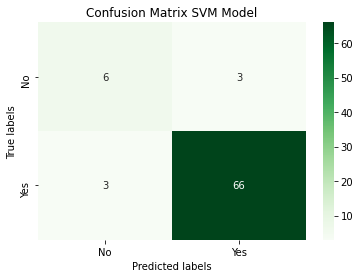

In [38]:
create_Numconfusion_matrix(svm_prediction, "SVM")

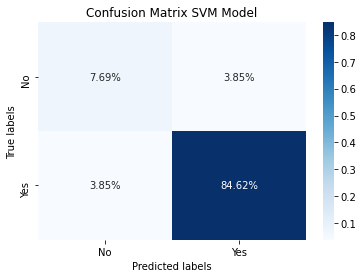

In [39]:
create_Perconfusion_matrix(svm_prediction, 'SVM')

Above we see two matrices that highlight the accuracy of the SVM model. The model predicted about 92% correctly. In the context of the data set, this performance is even better, as only 3 cases were predicted to be False Negatives, i.e. the patient had cancer but the model predicted no cancer. These cases are eliminated in an ideal world, where no patients fall through the cracks. However, this is a good initial step.

## Logistic Regression Confusion Matrix


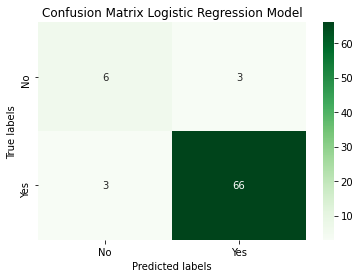

In [40]:
create_Numconfusion_matrix(LR_prediction, "Logistic Regression")

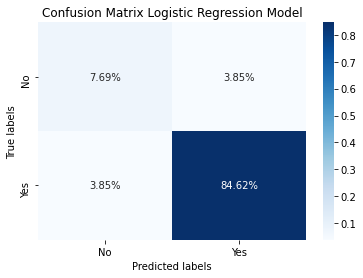

In [41]:
create_Perconfusion_matrix(LR_prediction, 'Logistic Regression')

Above we see two matrices that highlight the accuracy of the Logistic Regression model. Interestingly, the model performed as well as the SVM model. This might be due to the smaller dataset, further research should be done to identify the difference. 

# Random Forest Classifier

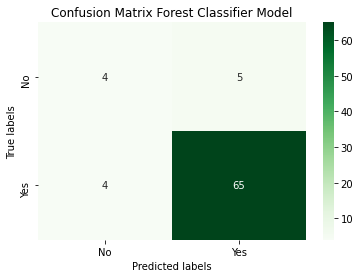

In [42]:
create_Numconfusion_matrix(forest_prediction, "Forest Classifier")

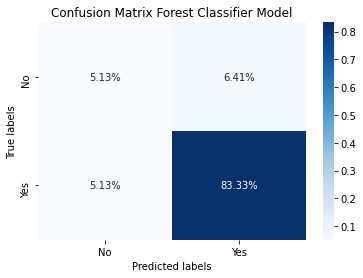

In [43]:
create_Perconfusion_matrix(forest_prediction, "Forest Classifier")

Above we see two matrices that highlight the accuracy of the Random Forest Classifier model. As we can see in the matrices, the model performs worse than the svm and logistic regression models, which is highlighted by lower values for True Positive and True Negatives. A larger dataset might pronounce the differences. 

## K Nearest Neighbour

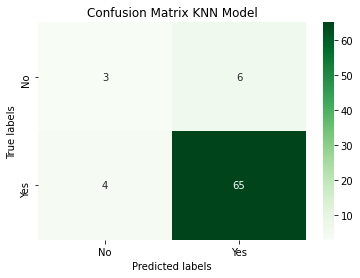

In [44]:
create_Numconfusion_matrix(knn_prediction, "KNN")

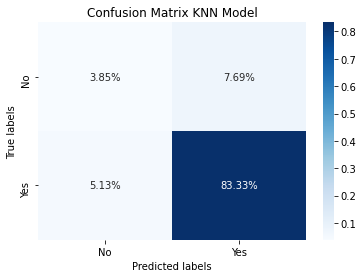

In [45]:
create_Perconfusion_matrix(knn_prediction, "KNN")

Above we see two matrices that highlight the accuracy of the K Nearest Neighbour model. Interestingly, as we can see in the matrices, the model performs worse than the svm and logistic regression models, which is highlighted by lower values for True Positive and True Negatives. However, the model does more oftenly misclassify patients who do not have cancer as if they do have cancer, i.e. a False Positive. This inaccuracy could be more acceptable than that of the Random Forest Classifier model, as in the context of this project means that False Negatives weigh very strongly. We do not want someone to walk around with a treatable disease, and whilst a False Positive could give some quite a scare, it does mean a lower chance of people falling through the cracks.

In [46]:
def absolute_squared_metrics(prediction, title):
    mae_controle = 100 - (100* mean_absolute_error(y_valid, prediction))
    mse_controle = 100 - (100* mean_squared_error(y_valid, prediction))    
    print(f"The {title} model has the following metric outputs")
    print(f'Mean Absolute Error {title} Model: {mae_controle}')
    print(f'Mean Squeared Error {title} Model: {mse_controle}')


In [47]:
absolute_squared_metrics(svm_prediction, 'SVM')

The SVM model has the following metric outputs
Mean Absolute Error SVM Model: 92.3076923076923
Mean Squeared Error SVM Model: 92.3076923076923


In [48]:
absolute_squared_metrics(LR_prediction, 'Logistic Regression')

The Logistic Regression model has the following metric outputs
Mean Absolute Error Logistic Regression Model: 92.3076923076923
Mean Squeared Error Logistic Regression Model: 92.3076923076923


In [49]:
absolute_squared_metrics(forest_prediction, 'Random Forest Classifier')

The Random Forest Classifier model has the following metric outputs
Mean Absolute Error Random Forest Classifier Model: 88.46153846153847
Mean Squeared Error Random Forest Classifier Model: 88.46153846153847


In [50]:
absolute_squared_metrics(knn_prediction, 'KNN')

The KNN model has the following metric outputs
Mean Absolute Error KNN Model: 87.17948717948718
Mean Squeared Error KNN Model: 87.17948717948718


In [51]:
def class_report(prediction, title):
    report = classification_report(y_valid, prediction)
    print(f"The {title} classification report is shown below:")
    print(report)

In [52]:
class_report(svm_prediction, 'SVM')

The SVM classification report is shown below:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         9
           1       0.96      0.96      0.96        69

    accuracy                           0.92        78
   macro avg       0.81      0.81      0.81        78
weighted avg       0.92      0.92      0.92        78



In [53]:
class_report(LR_prediction, 'Logistic Regression')

The Logistic Regression classification report is shown below:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         9
           1       0.96      0.96      0.96        69

    accuracy                           0.92        78
   macro avg       0.81      0.81      0.81        78
weighted avg       0.92      0.92      0.92        78



In [54]:
class_report(forest_prediction, 'Random Forest Classifier')

The Random Forest Classifier classification report is shown below:
              precision    recall  f1-score   support

           0       0.50      0.44      0.47         9
           1       0.93      0.94      0.94        69

    accuracy                           0.88        78
   macro avg       0.71      0.69      0.70        78
weighted avg       0.88      0.88      0.88        78



In [55]:
class_report(knn_prediction, 'KNN')

The KNN classification report is shown below:
              precision    recall  f1-score   support

           0       0.43      0.33      0.38         9
           1       0.92      0.94      0.93        69

    accuracy                           0.87        78
   macro avg       0.67      0.64      0.65        78
weighted avg       0.86      0.87      0.86        78



# Overal Performance Summary

In [56]:
models = ['Logistic Regression', 'KNN', 'SVM', 'Random Forest']

lr_acc = accuracy_score(y_valid, LR_prediction)
knn_acc = accuracy_score(y_valid, knn_prediction)
svm_acc = accuracy_score(y_valid, svm_prediction)
forest_acc = accuracy_score(y_valid, forest_prediction)

scores = [lr_acc , knn_acc, svm_acc, forest_acc,]

models = pd.DataFrame({'Model' : models, 'Score' : scores})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic Regression,0.923077
2,SVM,0.923077
3,Random Forest,0.884615
1,KNN,0.871795


# Going Deeper

## Feature Ablation

Whilst seeing which of the 4 models would perform best, it still leaves some questions. For example, what are the most important features that contribute to lung cancer? Knowing this can help politicians to enhance their legislations and it could perhaps also help smokers to change their ways.

But what is feature ablation? In short, it is systematically removing features from your dataset to check its importance towards the models prediction (originally coined in the field of Biology). Below we will go through the ablation.

In [57]:
def model_creation(model, X_train_ap, X_valid_ap, y_train, y_test):
    """
    This function encapsulates the creation and training of each model used above. This function will create and fit the model, 
    make a prediction with said model and return the accuracy score of said model. It takes in the model used and the divided 
    data.
    """
    
    if model == 'svm':
        svm_model = svm.SVC(kernel='linear')
        svm_model.fit(X_train_ap, y_train)
        y_prediction = svm_model.predict(X_valid_ap)
        return accuracy_score(y_valid, y_prediction)
    
    elif model == 'rf':
        forest_model = RandomForestClassifier(random_state=0)
        forest_model.fit(X_train_ap, y_train)
        y_prediction = forest_model.predict(X_valid_ap)
        return accuracy_score(y_valid, y_prediction)
    
    elif model == 'knn':
        k_model = KNeighborsClassifier(n_neighbors=16)
        kfit_model = k_model.fit(X_train_ap, y_train)
        y_prediction = k_model.predict(X_valid_ap)
        return accuracy_score(y_valid, y_prediction)
    
    elif model == 'lr':
        LR_model = LogisticRegression()
        LR_model.fit(X_train_ap, y_train)
        y_prediction = LR_model.predict(X_valid_ap)
        return accuracy_score(y_valid, y_prediction)

In [107]:
base_scores_list = [svm_acc, forest_acc, knn_acc, lr_acc]

def feature_ablation():
    """
    This function creates a new dataframe where the to be ablated column is removed, and then calls the model_creation function
    to remake the models. Following this, the accuracy scores is returned by the model_creation function and stored in the 
    coïnciding list.
    """ 
    
    # The base score of the models predictions when using all features is shown above, under "Overal Performance Summary"
    # We also need to create a list for each model to store the different ablation trials
    svm_ablation = []
    RF_ablation = []
    knn_ablation = []
    LR_ablation = [] 
      
    svm_scores = []
    rf_scores = []
    knn_scores = []
    LR_scores = []
    
    
## Create a loop that loops as often as there are columns, thereby testing ablation on each column
    #for column in range(X_train.shape[1]):
    for column in range(15):    
        # (re)copy the numpy array to ensure we only work with 1 removed column
        X_train_ap = X_train.copy()
        X_valid_ap = X_valid.copy()
       

        #Drop the found column from the copied numpy array
        X_train_ap = np.delete(X_train_ap, column, 1)
        X_valid_ap = np.delete(X_valid_ap, column, 1)

        #Create the models and store results in a list
        svm_ablation.append(model_creation('svm', X_train_ap, X_valid_ap, y_train, y_valid))
        RF_ablation.append(model_creation('rf', X_train_ap, X_valid_ap, y_train, y_valid))
        knn_ablation.append(model_creation('knn', X_train_ap, X_valid_ap, y_train, y_valid))
        LR_ablation.append(model_creation('lr', X_train_ap, X_valid_ap, y_train, y_valid))
    

    
        #Calculate scores and store them in a different list
        svm_scores.append(sorted_features(svm_ablation, base_scores_list[0]))
        rf_scores.append(sorted_features(RF_ablation, base_scores_list[1]))
        knn_scores.append(sorted_features(knn_ablation, base_scores_list[2]))
        LR_scores.append(sorted_features(LR_ablation, base_scores_list[3]))

    return svm_scores ,rf_scores, knn_scores, LR_scores  

In [108]:
def sorted_features(models, base_score): 
    """
    This function gets the ablated model and its corresponding base score. Using the scores of the ablated model, it calculates 
    the differences between the base score and the ablated model for each column. 
    """

    altered_scores = []
    for score in models:
        altered_scores.append(base_score-score)

    return altered_scores

In [74]:
svm_scores, rf_scores, knn_scores, LR_scores = feature_ablation()

### Ablation results

Below are the ablation results shown. For each index in the list, the value represents ablated models score subtracted from the base score.

In [82]:
svm_ablated_difference = svm_scores[14]
rf_ablated_difference = rf_scores[14]
knn_ablated_difference = knn_scores[14]
LR_ablated_difference = LR_scores[14]

In [106]:
def results(score_differences):
    for column_index in enumerate(ablation_model_scores):
        print(f"Ablated Column Index: {column_index[0]},       Ablated Model Score:  {column_index[1]} ")

In [102]:
results(svm_ablated_difference)

Ablated Column Index: 0,       Ablated Model Score:  0.012820512820512886 
Ablated Column Index: 1,       Ablated Model Score:  0.0 
Ablated Column Index: 2,       Ablated Model Score:  0.012820512820512886 
Ablated Column Index: 3,       Ablated Model Score:  0.0 
Ablated Column Index: 4,       Ablated Model Score:  0.02564102564102566 
Ablated Column Index: 5,       Ablated Model Score:  0.03846153846153855 
Ablated Column Index: 6,       Ablated Model Score:  0.03846153846153855 
Ablated Column Index: 7,       Ablated Model Score:  0.03846153846153855 
Ablated Column Index: 8,       Ablated Model Score:  0.012820512820512886 
Ablated Column Index: 9,       Ablated Model Score:  0.02564102564102566 
Ablated Column Index: 10,       Ablated Model Score:  0.012820512820512886 
Ablated Column Index: 11,       Ablated Model Score:  0.0 
Ablated Column Index: 12,       Ablated Model Score:  0.012820512820512886 
Ablated Column Index: 13,       Ablated Model Score:  0.012820512820512886 
Ab

In [103]:
results(rf_ablated_difference)

Ablated Column Index: 0,       Ablated Model Score:  0.02564102564102566 
Ablated Column Index: 1,       Ablated Model Score:  0.0 
Ablated Column Index: 2,       Ablated Model Score:  0.0 
Ablated Column Index: 3,       Ablated Model Score:  0.0 
Ablated Column Index: 4,       Ablated Model Score:  0.0 
Ablated Column Index: 5,       Ablated Model Score:  0.0 
Ablated Column Index: 6,       Ablated Model Score:  0.0 
Ablated Column Index: 7,       Ablated Model Score:  0.0 
Ablated Column Index: 8,       Ablated Model Score:  -0.012820512820512886 
Ablated Column Index: 9,       Ablated Model Score:  0.0 
Ablated Column Index: 10,       Ablated Model Score:  0.0 
Ablated Column Index: 11,       Ablated Model Score:  0.0 
Ablated Column Index: 12,       Ablated Model Score:  0.0 
Ablated Column Index: 13,       Ablated Model Score:  0.012820512820512775 
Ablated Column Index: 14,       Ablated Model Score:  0.0 


In [104]:
results(knn_ablated_difference)

Ablated Column Index: 0,       Ablated Model Score:  0.012820512820512886 
Ablated Column Index: 1,       Ablated Model Score:  0.0 
Ablated Column Index: 2,       Ablated Model Score:  0.0 
Ablated Column Index: 3,       Ablated Model Score:  0.012820512820512886 
Ablated Column Index: 4,       Ablated Model Score:  0.012820512820512886 
Ablated Column Index: 5,       Ablated Model Score:  0.012820512820512886 
Ablated Column Index: 6,       Ablated Model Score:  0.012820512820512886 
Ablated Column Index: 7,       Ablated Model Score:  0.012820512820512886 
Ablated Column Index: 8,       Ablated Model Score:  0.012820512820512886 
Ablated Column Index: 9,       Ablated Model Score:  0.012820512820512886 
Ablated Column Index: 10,       Ablated Model Score:  0.0 
Ablated Column Index: 11,       Ablated Model Score:  0.012820512820512886 
Ablated Column Index: 12,       Ablated Model Score:  0.012820512820512886 
Ablated Column Index: 13,       Ablated Model Score:  0.01282051282051288

In [105]:
results(LR_ablated_difference)

Ablated Column Index: 0,       Ablated Model Score:  0.012820512820512886 
Ablated Column Index: 1,       Ablated Model Score:  0.02564102564102566 
Ablated Column Index: 2,       Ablated Model Score:  0.012820512820512886 
Ablated Column Index: 3,       Ablated Model Score:  0.012820512820512886 
Ablated Column Index: 4,       Ablated Model Score:  0.012820512820512886 
Ablated Column Index: 5,       Ablated Model Score:  0.02564102564102566 
Ablated Column Index: 6,       Ablated Model Score:  0.03846153846153855 
Ablated Column Index: 7,       Ablated Model Score:  0.0 
Ablated Column Index: 8,       Ablated Model Score:  0.012820512820512886 
Ablated Column Index: 9,       Ablated Model Score:  0.05128205128205132 
Ablated Column Index: 10,       Ablated Model Score:  0.012820512820512886 
Ablated Column Index: 11,       Ablated Model Score:  0.0 
Ablated Column Index: 12,       Ablated Model Score:  0.03846153846153855 
Ablated Column Index: 13,       Ablated Model Score:  0.01282

As we see from the results above, there is only one instance where the deletion of a feature results in a better performance. This can be seen when the 8th feature (ALLERGY) in the Random Forest Classifier is deleted. This results in a small enhancement, where the ablated model outperforms the base model by 0.013 per cent. However, interestingly deleting this feature in other models does not perform in a better model, but quite the opposite. 

###### why does this happen in RF?

Another interesting outcome is that the scores of several ablated models are the same. This could indicate that these features have the same impact in the models, which could mean that we could possible remove them as well.

Text(158.09375, 0.5, 'Lung Cancer Features')

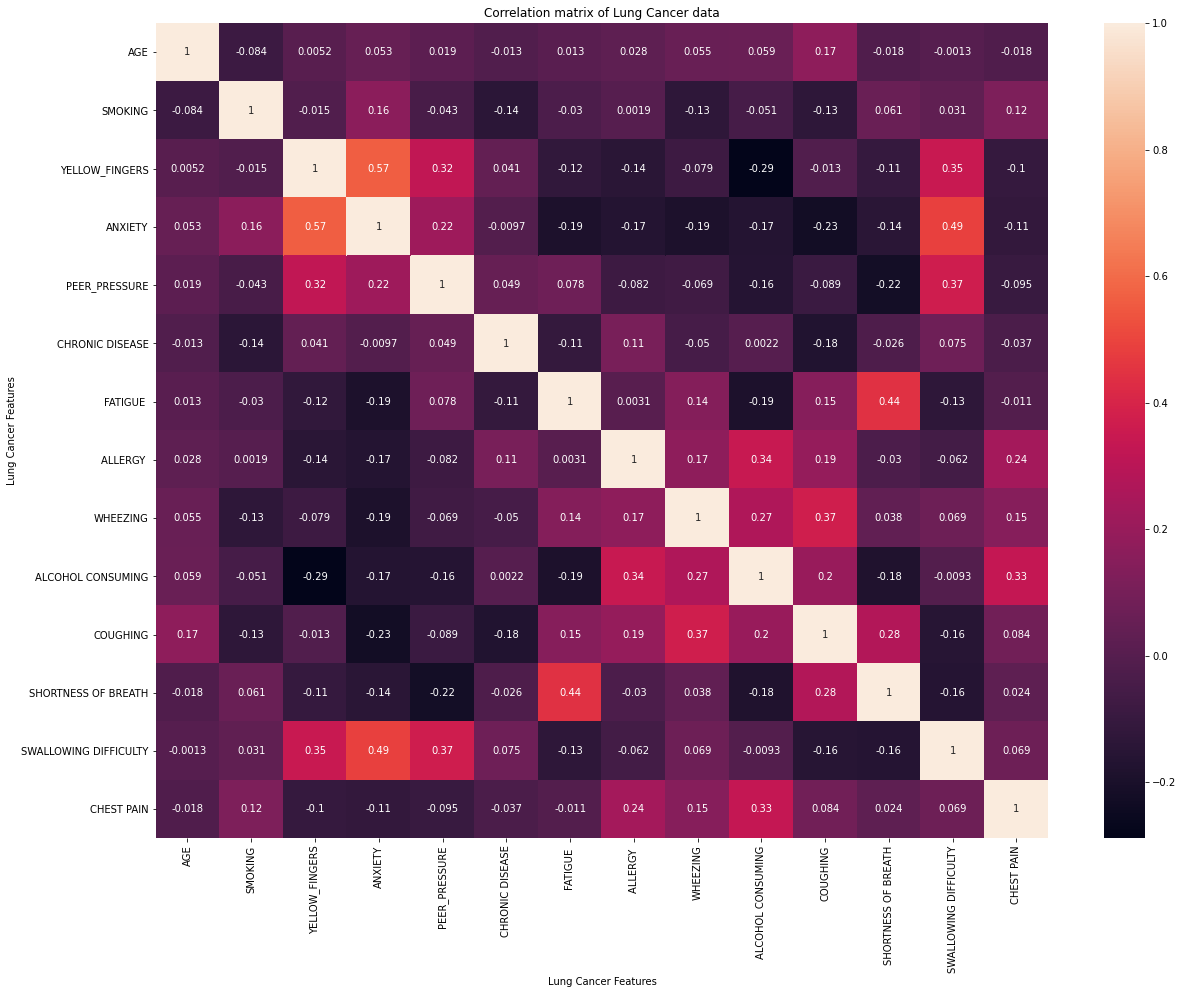

In [115]:
correlation_matrix = df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation matrix of Lung Cancer data")
plt.xlabel("Lung Cancer Features")
plt.ylabel("Lung Cancer Features")

From the correlation matrix above, we can see that most features are barely correlated, but there are some exceptions. Take for examle the strong positive correlation between Anxiety and Yellow Fingers features or the noticable, but weak negative correlation between Alcohol Consuming and Yellow Fingers features. However, this does not explain the previously shown results and why the models perfoo. Let's dive deeper.

# Conclusion

In this document I have investigated a small data set regarding Lung Cancer and factors influencing it. This data set is collected from Kaggle, and the link to it can be found at the top of this document. After investigating the data set I have seperated the output set and input set, and performed one-hot encoding to transform the categorical data into numerical. Following this, I built 3 models known to work well for binary classification problems, those being the Random Forest Regressor, the Support Vector Machine, and Logistic Regression models. I then performed some evaluation methods, and from this evaluation we can see that the SVM model works best, as it has the lowest error rate and highest overall precision, recall, support and (those combined into) f1-score. 